## Order Projection
Evan Budianto

- evanbudianto@gmail.com
- https://www.linkedin.com/in/evanbudianto/

### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

### Import Dataset

In [2]:
DATAPATH = r'orders.csv'

df = pd.read_csv(DATAPATH, sep=';')
df.head()

,order_date,total_order,product_1,product_2,product_3,product_4,product_5,product_6
0,01/01/2020,8794,50,2436,1504,510,1776,2518
1,02/01/2020,3496,622,622,210,877,717,448
2,03/01/2020,3384,562,328,1022,589,447,436
3,04/01/2020,3325,53,50,1007,894,888,433
4,05/01/2020,3230,74,543,759,849,601,404


In [3]:
df.tail()

,order_date,total_order,product_1,product_2,product_3,product_4,product_5,product_6
420,24/02/2021,15590,2822,4428,2947,889,3118,1386
421,25/02/2021,46771,8232,8232,3134,11973,9822,5378
422,26/02/2021,17134,2810,1628,5106,2947,2502,2141
423,27/02/2021,16620,296,133,5086,4305,4537,2263
424,28/02/2021,15789,458,2605,3568,4089,2731,2338


In [4]:
df.shape

(425, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_date   425 non-null    object
 1   total_order  425 non-null    int64 
 2   product_1    425 non-null    int64 
 3   product_2    425 non-null    int64 
 4   product_3    425 non-null    int64 
 5   product_4    425 non-null    int64 
 6   product_5    425 non-null    int64 
 7   product_6    425 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 26.7+ KB


In [6]:
# correcting date format
df['order_date'] = pd.to_datetime(df['order_date'], format="%d/%m/%Y")

In [7]:
# set Order Date as index
df.set_index('order_date', inplace=True)

In [8]:
df.tail()

,total_order,product_1,product_2,product_3,product_4,product_5,product_6
order_date,,,,,,,
2021-02-24,15590,2822,4428,2947,889,3118,1386
2021-02-25,46771,8232,8232,3134,11973,9822,5378
2021-02-26,17134,2810,1628,5106,2947,2502,2141
2021-02-27,16620,296,133,5086,4305,4537,2263
2021-02-28,15789,458,2605,3568,4089,2731,2338


In [9]:
df.describe()

,total_order,product_1,product_2,product_3,product_4,product_5,product_6
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,12758.108235,1646.275294,2330.061176,2750.065882,2205.136471,2176.228235,1650.341176
std,11626.547062,1852.515812,2747.987134,2971.261575,2336.868574,2575.777352,2891.854589
min,2024.000000,0.000000,0.000000,0.000000,3.000000,5.000000,267.000000
25%,7000.000000,320.000000,896.000000,1137.000000,905.000000,1023.000000,816.000000
50%,11132.000000,1445.000000,1735.000000,2244.000000,1838.000000,1658.000000,1341.000000
75%,15344.000000,2442.000000,3060.000000,3470.000000,2817.000000,2606.000000,1768.000000
max,119291.000000,21769.000000,32359.000000,37219.000000,32089.000000,32089.000000,52148.000000


<AxesSubplot:xlabel='order_date'>

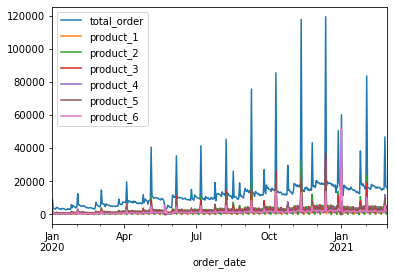

In [10]:
df.plot()

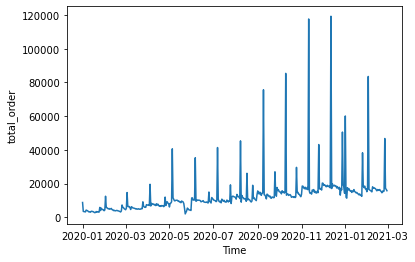

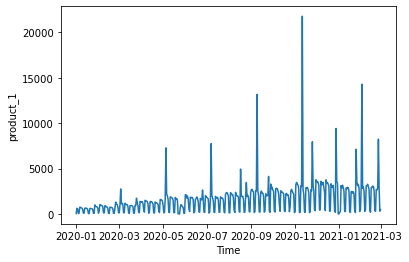

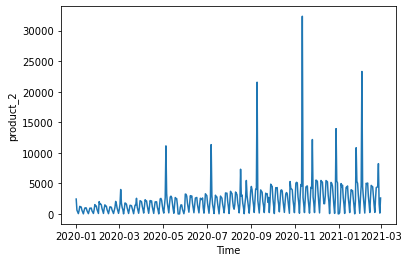

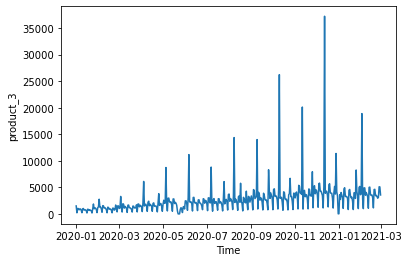

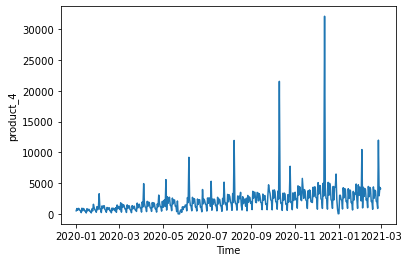

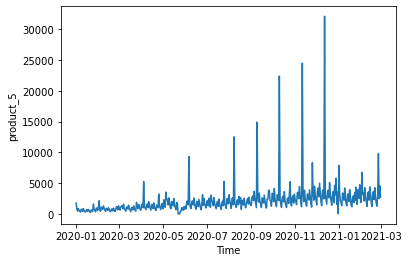

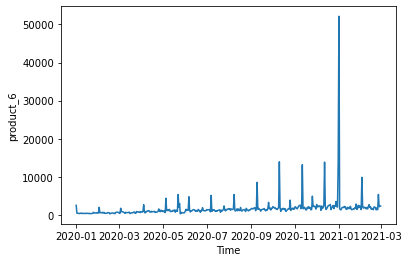

In [11]:
def plot_data(col):
#    plt.figure(figsize=(17, 8))
    plt.plot(df[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()
    
for col in df.columns:
    plot_data(col)

### Import Holidays

In [12]:
datapath_holidays = r'holidays.csv'

df_holidays = pd.read_csv(datapath_holidays, sep=';')

In [13]:
# correcting date format
df_holidays['Date'] = pd.to_datetime(df_holidays['Date'], format="%d/%m/%Y")

In [14]:
df_holidays.head()

,Campaign Name,Date
0,Double-Double Campaign,2020-01-01
1,Payday Sale,2020-01-25
2,Double-Double Campaign,2020-02-02
3,Payday Sale,2020-02-25
4,Double-Double Campaign,2020-03-03


In [15]:
# change columns name to meet prophet requirement
df_holidays.columns = ['holiday', 'ds']
df_holidays.head()

,holiday,ds
0,Double-Double Campaign,2020-01-01
1,Payday Sale,2020-01-25
2,Double-Double Campaign,2020-02-02
3,Payday Sale,2020-02-25
4,Double-Double Campaign,2020-03-03


### Modelling

In [16]:
# prophet library hasn't been installed on this computer
#!conda install -c conda-forge fbprophet -y

Solving environment: ...working... done

# All requested packages already installed.



In [17]:
# update plotly
#!pip install --upgrade plotly

In [1]:
#pip install pystan==2.19.1.1

  Attempting uninstall: pystan
    Found existing installation: pystan 2.18.0.0
    Uninstalling pystan-2.18.0.0:
      Successfully uninstalled pystan-2.18.0.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, which is not installed.
fbprophet 0.7.1 requires setuptools-git>=1.2, which is not installed.


In [19]:
#!conda install pystan==2.17.1.0
#!conda install -c conda-forge fbprophet==0.6.0

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed



Examining @/win-64::__cuda==11.5=0:  80%|########  | 4/5 [00:01<00:00,  2.99it/s]      
                                                                                 

Examining conflict for pystan python:   0%|          | 0/5 [00:00<?, ?it/s]
                                                                           

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - pystan==2.17.1.0 -> python[version='>=2.7,<2.8.0a0|>=3.7,<3.8.0a0|>=3.5,<3.6.0a0|>=3.6,<3.7.0a0']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.





Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed



Examining fbprophet==0.6.0:  80%|########  | 4/5 [00:02<00:01,  1.43s/it]    
                                                                         

Examining conflict for python fbprophet:   0%|          | 0/5 [00:00<?, ?it/s]
                                                                              

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - fbprophet==0.6.0 -> python[version='>=3.6,<3.7.0a0|>=3.7,<3.8.0a0']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.





In [16]:
# import prophet
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

In [17]:
# Splitting train and test dataset. Test set is order data from February 2021.
df_train = df.loc[:'2021-01-31']
df_test = df.loc['2021-02-01':]

In [18]:
df_train.tail()

,total_order,product_1,product_2,product_3,product_4,product_5,product_6
order_date,,,,,,,
2021-01-27,17618,3118,5003,3312,898,3612,1675
2021-01-28,18544,3264,3060,1001,4729,3969,2521
2021-01-29,16921,2843,1574,4975,3012,2487,2030
2021-01-30,17019,269,102,5174,4374,4731,2369
2021-01-31,15195,441,2629,3616,3981,2690,1838


In [19]:
df_test.head()

,total_order,product_1,product_2,product_3,product_4,product_5,product_6
order_date,,,,,,,
2021-02-01,16715,2908,4630,3811,2106,1855,1405
2021-02-02,83573,14291,23317,18888,10447,6769,9861
2021-02-03,16548,2830,4484,2830,976,3210,2218
2021-02-04,16217,2968,2789,989,4330,3373,1768
2021-02-05,15892,2495,1494,4911,2845,2098,2049


In [20]:
# take first column for modelling
df_train1 = df_train[['product_1']]

In [21]:
df_train1.head()

,product_1
order_date,
2020-01-01,50
2020-01-02,622
2020-01-03,562
2020-01-04,53
2020-01-05,74


In [22]:
# put date index as column and change columns name for prophet
df_train1 = df_train1.reset_index()
df_train1.columns = ['ds', 'y']
df_train1.head()

,ds,y
0,2020-01-01,50
1,2020-01-02,622
2,2020-01-03,562
3,2020-01-04,53
4,2020-01-05,74


In [23]:
# Defining model with yearly seasonality and holidays. Then fitting.
m = Prophet(daily_seasonality=False, yearly_seasonality=True, holidays = df_holidays)
m.fit(df_train1)

In [24]:
# Forecasting February 2021 orders
prediction_size = 28
future = m.make_future_dataframe(periods=prediction_size)
forecast = m.predict(future)

In [25]:
forecast.tail(28)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,Double-Double Campaign,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
397,2021-02-01,2324.661190,1503.180795,4211.824831,2324.661190,2324.661190,0.0,0.0,0.0,0.000000,...,738.398682,738.398682,738.398682,-174.135064,-174.135064,-174.135064,0.0,0.0,0.0,2888.924808
398,2021-02-02,2329.222985,5445.625086,8107.537390,2329.222985,2329.222985,0.0,0.0,0.0,4125.423523,...,543.235601,543.235601,543.235601,-180.891630,-180.891630,-180.891630,0.0,0.0,0.0,6816.990480
399,2021-02-03,2333.784780,1764.321027,4358.213761,2333.784780,2333.784780,0.0,0.0,0.0,0.000000,...,990.239278,990.239278,990.239278,-189.049482,-189.049482,-189.049482,0.0,0.0,0.0,3134.974577
400,2021-02-04,2338.346575,1221.279327,3862.767805,2338.346575,2338.346575,0.0,0.0,0.0,0.000000,...,443.626596,443.626596,443.626596,-198.345373,-198.345373,-198.345373,0.0,0.0,0.0,2583.627798
401,2021-02-05,2342.908370,904.129784,3675.959140,2342.908370,2342.908371,0.0,0.0,0.0,0.000000,...,149.069029,149.069029,149.069029,-208.481620,-208.481620,-208.481620,0.0,0.0,0.0,2283.495779
402,2021-02-06,2347.470165,-719.572419,1902.280896,2347.470164,2347.470166,0.0,0.0,0.0,0.000000,...,-1547.902110,-1547.902110,-1547.902110,-219.137057,-219.137057,-219.137057,0.0,0.0,0.0,580.430999
403,2021-02-07,2352.031960,-519.330309,2216.897964,2352.031958,2352.031962,0.0,0.0,0.0,0.000000,...,-1316.667077,-1316.667077,-1316.667077,-229.978408,-229.978408,-229.978408,0.0,0.0,0.0,805.386475
404,2021-02-08,2356.593755,1488.751579,4230.987431,2356.593753,2356.593758,0.0,0.0,0.0,0.000000,...,738.398682,738.398682,738.398682,-240.671701,-240.671701,-240.671701,0.0,0.0,0.0,2854.320736
405,2021-02-09,2361.155550,1326.506504,3997.660927,2361.155547,2361.155553,0.0,0.0,0.0,0.000000,...,543.235601,543.235601,543.235601,-250.893372,-250.893372,-250.893372,0.0,0.0,0.0,2653.497779
406,2021-02-10,2365.717345,1802.170246,4518.088269,2365.717341,2365.717349,0.0,0.0,0.0,0.000000,...,990.239278,990.239278,990.239278,-260.340712,-260.340712,-260.340712,0.0,0.0,0.0,3095.615912


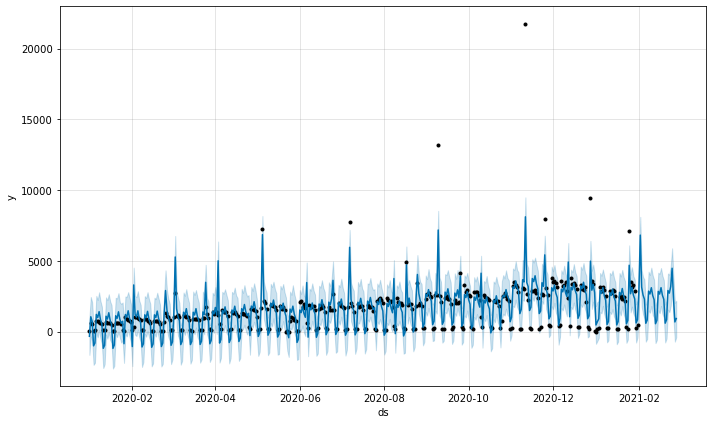

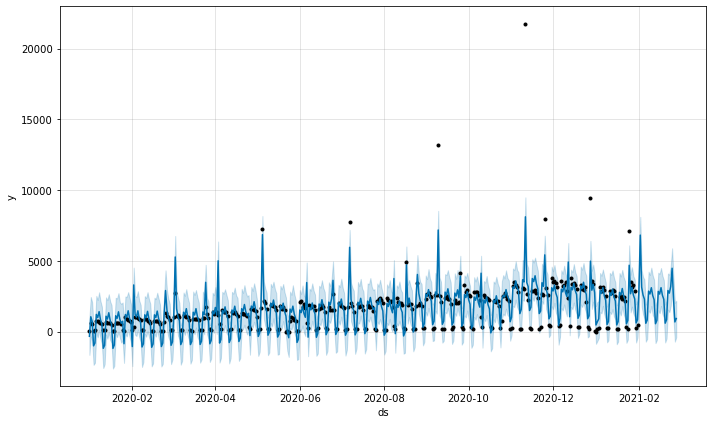

In [26]:
# plot forecast
m.plot(forecast)

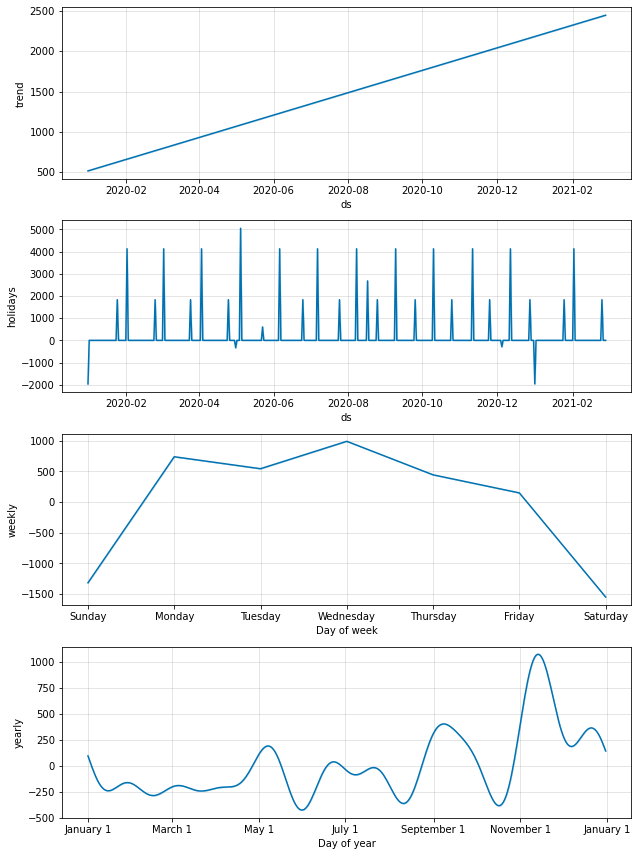

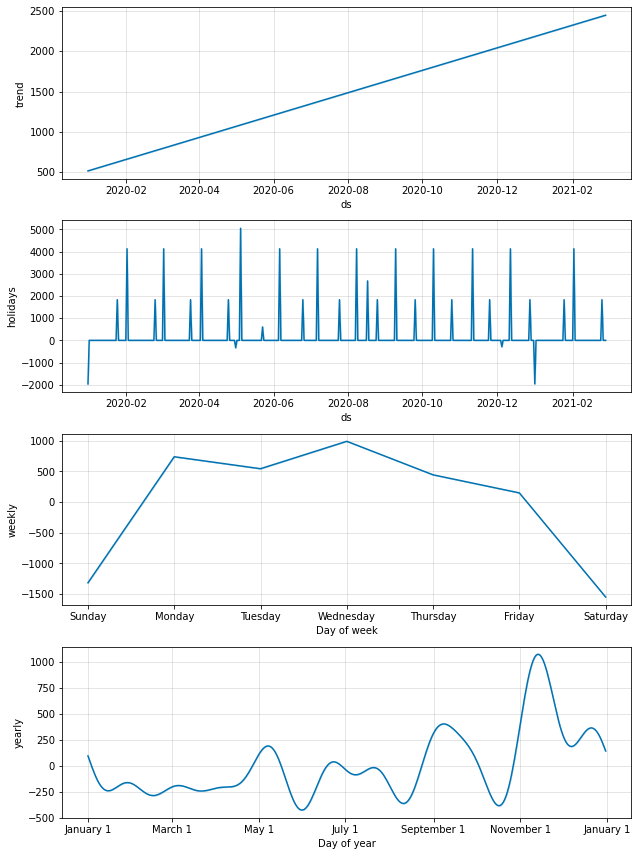

In [27]:
# plot prophet components from model
m.plot_components(forecast)

In [28]:
# function for comparing forecast and real data
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical)

In [30]:
cmp_df = make_comparison_dataframe(df[['product_1']], forecast)

cmp_df.tail(28)

,yhat,yhat_lower,yhat_upper,product_1
ds,,,,
2021-02-01,2888.924808,1503.180795,4211.824831,2908
2021-02-02,6816.990480,5445.625086,8107.537390,14291
2021-02-03,3134.974577,1764.321027,4358.213761,2830
2021-02-04,2583.627798,1221.279327,3862.767805,2968
2021-02-05,2283.495779,904.129784,3675.959140,2495
2021-02-06,580.430999,-719.572419,1902.280896,277
2021-02-07,805.386475,-519.330309,2216.897964,438
2021-02-08,2854.320736,1488.751579,4230.987431,3100
2021-02-09,2653.497779,1326.506504,3997.660927,3100


In [31]:
# function for calculation MAPE and MAE
def calculate_forecast_errors(df, prediction_size, col):
    
    df = df.copy()
    
    df['e'] = df[col] - df['yhat']
    df['p'] = 100 * df['e'] / df[col]
    
    predicted_part = df[-prediction_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [33]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size, 'product_1').items():
    print(err_name, err_value)

MAPE 46.22710689125608
MAE 683.8478103809408


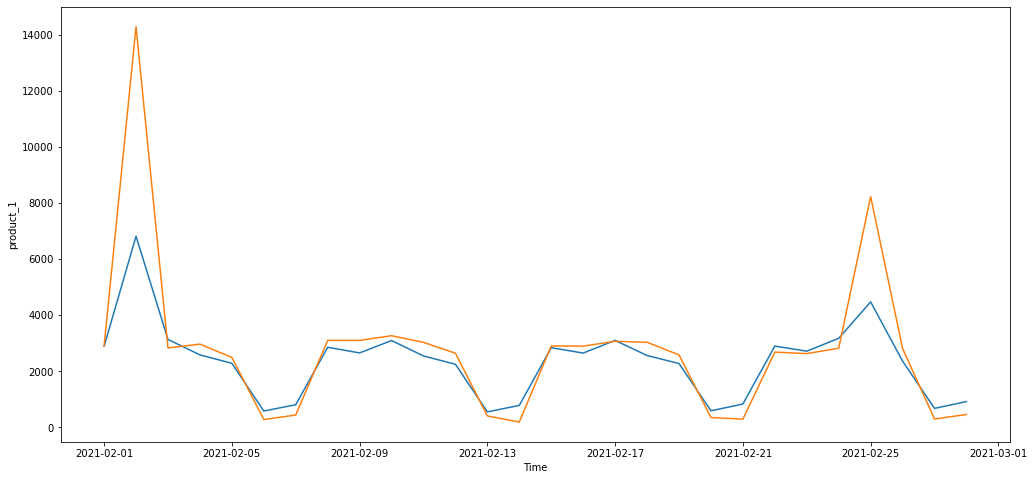

In [34]:
# plotting forecast vs real data
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'].loc['2021-02-01':])
#plt.plot(cmp_df['yhat_lower'])
#plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['product_1'].loc['2021-02-01':])
plt.xlabel('Time')
plt.ylabel('product_1')
plt.grid(False)
plt.show()

### Modelling on All Columns

In [35]:
def predict_order(col, df_cast):
    # select column to be trained
    train = df_train[[col]]
    test = df_test[[col]]
    
    train = train.reset_index()
    train.columns = ['ds', 'y']
    
    # define model
    m = Prophet(daily_seasonality=False, yearly_seasonality=True, holidays = df_holidays)
    m.fit(train)
    
    # forecasting
    prediction_size = 28
    future = m.make_future_dataframe(periods=prediction_size)
    forecast = m.predict(future)
    
    #comparison
    cmp_df = make_comparison_dataframe(df[[col]], forecast)
    cmp_df.head()
    
    for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size, col).items():
        print(col, err_name, "%.2f" % err_value)
        
    df_x = forecast[['yhat']].tail(28).reset_index(drop=True)
    df_forecast[col] = pd.Series(df_x['yhat'])

In [36]:
df.columns

Index(['total_order', 'product_1', 'product_2', 'product_3', 'product_4',
       'product_5', 'product_6'],
      dtype='object')

In [37]:
# listing all columns to be predicted
column_predict = ['product_1', 'product_2', 'product_3', 'product_4',
       'product_5', 'product_6']

In [48]:
# define dataframe for forecast result
df_forecast = df.reset_index()
df_forecast = df_forecast[['order_date']]
#df_forecast.columns = ['ds']
df_forecast = df_forecast[-28:].reset_index(drop=True)
df_forecast.head()

,order_date
0,2021-02-01
1,2021-02-02
2,2021-02-03
3,2021-02-04
4,2021-02-05


In [49]:
# running forecasting for all columns
for col in column_predict:
    predict_order(col, df_forecast)

product_1 MAPE 46.23
product_1 MAE 683.85
product_2 MAPE 51.43
product_2 MAE 847.72
product_3 MAPE 16.00
product_3 MAE 652.73
product_4 MAPE 17.24
product_4 MAE 667.34
product_5 MAPE 13.57
product_5 MAE 592.47
product_6 MAPE 80.20
product_6 MAE 1489.85


In [50]:
df_forecast.head()

,order_date,product_1,product_2,product_3,product_4,product_5,product_6
0,2021-02-01,2888.924808,4449.034577,3568.014324,2379.050753,2203.595965,2631.313049
1,2021-02-02,6816.990480,10269.646692,14233.585950,9550.895169,11578.541615,8515.778533
2,2021-02-03,3134.974577,4877.741159,3075.269952,1193.045717,3282.594959,2721.465842
3,2021-02-04,2583.627798,2868.121812,1518.650846,3470.434876,3022.206772,3340.148513
4,2021-02-05,2283.495779,2013.797065,3759.976687,2324.843873,2151.575460,3646.843335


In [51]:
df_forecast['total_order'] = df_forecast[column_predict].sum(axis=1)

In [52]:
# rearrange columns
cols = ['order_date', 'total_order', 'product_1', 'product_2', 'product_3', 'product_4',
       'product_5', 'product_6']
df_forecast = df_forecast[cols]

In [53]:
df_forecast.to_csv(r'forecast.csv', index=False, sep=',')